In [1]:
import pprint
import json
import pathlib
import pandas as pdWW
import os
import importlib

In [2]:
from lib.helpers import *
# importlib.reload(helpers)
pp = pprint.PrettyPrinter(indent=4)

In [3]:
dirty_hourly = pathlib.Path('../../../data/dirty/hourly/')
jsonl_files = os.listdir(dirty_hourly)

In [4]:
print(jsonl_files[0])

twitter_61.jsonl


# Part 1: Parse/Extract fields from a single Day

In [5]:
tweets = filter_tweet_fields_as_dict(pathlib.Path(dirty_hourly,jsonl_files[0]))

print first element 

In [6]:
# pp.pprint(tweets[0:10])

In [7]:
df = pd.DataFrame(tweets)
df.head()

,created_at,full_text,geo,id,lang,mention_ids,mentions,retweet_count,rt_status_id,rt_status_screen_name,screen_name
0,Tue Oct 29 11:58:59 +0000 2019,RT @CCNMarkets: Starbucks Will Accept Bitcoin ...,None,1189149629977452544,en,[1856523530],[CCNMarkets],0,1856523530,CCNMarkets,luisgfagundes
1,Tue Oct 29 11:58:59 +0000 2019,"RT @thefinancialfor: Every year since 2015, #B...",None,1189149627469193216,en,[2557010554],[thefinancialfor],0,2557010554,thefinancialfor,thefinancialfor
2,Tue Oct 29 11:58:57 +0000 2019,RT @RedditBTC: This perfectly explains the cur...,None,1189149619713957888,en,[951006367],[RedditBTC],0,951006367,RedditBTC,opp4wealth
3,Tue Oct 29 11:58:56 +0000 2019,Russian Metals Plant to Start Bitcoin Mining h...,None,1189149616459190272,en,[],[],0,NaN,NaN,Techtelegraph4
4,Tue Oct 29 11:58:52 +0000 2019,RT @BitcollarDApp: 3 days to go in IEO phase o...,None,1189149599581265920,en,[1140825020463104000],[BitcollarDApp],0,1140825020463104000,BitcollarDApp,tiago60334177


In [8]:
df[df['full_text'].str.contains('crypto')]

,created_at,full_text,geo,id,lang,mention_ids,mentions,retweet_count,rt_status_id,rt_status_screen_name,screen_name
9,Tue Oct 29 11:58:41 +0000 2019,There are 3 million #Bitcoins left. Why does t...,None,1189149554370842629,en,[],[],0,NaN,NaN,AvyLorenCohen
10,Tue Oct 29 11:58:41 +0000 2019,South Korea adopts blockchain in 2020. Governm...,None,1189149553779494915,en,[],[],0,NaN,NaN,onerazz
11,Tue Oct 29 11:58:41 +0000 2019,South Korea adopts blockchain in 2020. Governm...,None,1189149551246090240,en,[],[],0,NaN,NaN,jerayawara
20,Tue Oct 29 11:58:14 +0000 2019,"RT @Fisher85M: Why can't you cheat #bitcoin, @...",None,1189149440856219649,en,"[846014785246367745, 2696578399]","[Fisher85M, JacBurns_Comext]",0,846014785246367745,Fisher85M,Alexeycrypto
27,Tue Oct 29 11:58:04 +0000 2019,Starbucks Will Accept Bitcoin In 2020 Through ...,None,1189149399655571456,en,[],[],1,NaN,NaN,coinsferaglobal
29,Tue Oct 29 11:58:02 +0000 2019,Just incase you have been pondering on what AW...,None,1189149388221878272,en,[],[],18,NaN,NaN,el_priist
39,Tue Oct 29 11:57:44 +0000 2019,Excellent product and an excellent team that h...,None,1189149313886126080,en,[],[],0,NaN,NaN,dung1prohb
44,Tue Oct 29 11:57:32 +0000 2019,RT @channelBSV: Sigmapool launched the joint m...,None,1189149265127526400,en,[1105946811699744768],[channelBSV],0,1105946811699744768,channelBSV,MSkieller
47,Tue Oct 29 11:57:21 +0000 2019,OKEx Launches Crypto Futures Settled in Tether...,None,1189149218700746753,en,[1333467482],[coindesk],0,NaN,NaN,Coinboard
49,Tue Oct 29 11:57:20 +0000 2019,RT @_blockandchain_: China introduces a new cr...,None,1189149214288367618,en,[954018392146526208],[_blockandchain_],0,954018392146526208,_blockandchain_,fugitif27


In [9]:
df[df['full_text'].str.contains('BTC')]

,created_at,full_text,geo,id,lang,mention_ids,mentions,retweet_count,rt_status_id,rt_status_screen_name,screen_name
2,Tue Oct 29 11:58:57 +0000 2019,RT @RedditBTC: This perfectly explains the cur...,None,1189149619713957888,en,[951006367],[RedditBTC],0,951006367,RedditBTC,opp4wealth
6,Tue Oct 29 11:58:46 +0000 2019,RT @BTCTN: Why Central Banks Are Not Designed ...,None,1189149572259553281,en,[3367334171],[BTCTN],0,3367334171,BTCTN,Vindyne8
17,Tue Oct 29 11:58:19 +0000 2019,"RT @whale_alert: 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 43,653 #...",None,1189149460934213632,en,[1039833297751302144],[whale_alert],0,1039833297751302144,whale_alert,suminch3977
19,Tue Oct 29 11:58:17 +0000 2019,RT @bitcoinzay: If i thought i was too poor wh...,None,1189149453539782658,en,[54307047],[bitcoinzay],0,54307047,bitcoinzay,cokebyparis
28,Tue Oct 29 11:58:03 +0000 2019,@HuobiWallet $Bitcoin is the future\n\n#WeLoveBTC,None,1189149395536764928,en,[999509989239615489],[HuobiWallet],0,NaN,NaN,Crypto24842130
30,Tue Oct 29 11:58:02 +0000 2019,RT @newsbtc: Bitcoin Price Analysis by @Aayush...,None,1189149387718627330,en,"[2150123534, 141682698]","[newsbtc, AayushJs]",0,2150123534,newsbtc,Vindyne8
33,Tue Oct 29 11:57:54 +0000 2019,Earn bitcoins for clicking ads https://t.co/Tq...,None,1189149358257770497,en,[1532580908],[btcclicks],0,NaN,NaN,angeloruss
34,Tue Oct 29 11:57:54 +0000 2019,RT @holochainnews: ✔New listing!\n@H_O_L_O_ to...,None,1189149354306818048,en,"[1051195443655389186, 892865028939948033, 1364...","[holochainnews, H_O_L_O_, hitbtc]",0,1051195443655389186,holochainnews,AchieveLeague
42,Tue Oct 29 11:57:43 +0000 2019,RT @rektcapital: $ETH $ETHBTC #ethereum \n\nPl...,None,1189149308697923584,en,[918122676195090433],[rektcapital],0,918122676195090433,rektcapital,Steveekicks
55,Tue Oct 29 11:57:09 +0000 2019,RT @MichellePhan: A great book to understand t...,None,1189149168729808896,en,"[17674486, 18469669]","[MichellePhan, saifedean]",0,17674486,MichellePhan,hishambenadel


In [10]:
df[df['full_text'].str.contains('ETH')]

,created_at,full_text,geo,id,lang,mention_ids,mentions,retweet_count,rt_status_id,rt_status_screen_name,screen_name
42,Tue Oct 29 11:57:43 +0000 2019,RT @rektcapital: $ETH $ETHBTC #ethereum \n\nPl...,None,1189149308697923584,en,[918122676195090433],[rektcapital],0,918122676195090433,rektcapital,Steveekicks
209,Tue Oct 29 11:51:51 +0000 2019,🔥Today's top #Cryptonews: \n\n- #Samsung integ...,None,1189147835377340416,en,[3389763521],[PaxosGlobal],1,NaN,NaN,CryptonewsCom
343,Tue Oct 29 11:47:29 +0000 2019,@_thebamboo_io #thebamboo #ICO #Crowdsale #Bit...,None,1189146735760666625,en,[1156176877511434240],[_thebamboo_io],0,NaN,NaN,frankydoodle01
353,Tue Oct 29 11:47:18 +0000 2019,#thebamboo #ICO #Crowdsale #Bitcoin #Blockchai...,None,1189146686691504128,en,[],[],0,NaN,NaN,frankydoodle01
380,Tue Oct 29 11:46:34 +0000 2019,#DTA #BTC #ETH It's weighted and based on bitc...,None,1189146504038178816,en,[],[],0,NaN,NaN,webnowcompany
466,Tue Oct 29 11:43:53 +0000 2019,RT @infinite27TS: 🆕LET US GROW TOGETHER!\n5000...,None,1189145828851703809,en,"[None, 1183548205801172992, 1147678825062391808]","[infinite27TS, MTradesatoshi, ModChicky_TS]",0,959047369512796161,Crypto_infinite,StefanDziu
470,Tue Oct 29 11:43:45 +0000 2019,RT @CryptoTownEU: 🚀 Airdrop : Botz Token\n💰 Va...,None,1189145794454130688,en,[1034478294677250048],[CryptoTownEU],0,1034478294677250048,CryptoTownEU,Harpree29747054
488,Tue Oct 29 11:43:26 +0000 2019,RT @cryptosUSD: 🔄 Prices update in $USD (1 hou...,None,1189145717060886528,en,[1024959511071797248],[cryptosUSD],0,1024959511071797248,cryptosUSD,republicadozap
495,Tue Oct 29 11:43:12 +0000 2019,RT @CoinTradingBot: Top 100 avg 24h return: 0....,None,1189145654939000835,en,"[904014303975571457, 2510084300]","[CoinTradingBot, Bytecoin_BCN]",0,904014303975571457,CoinTradingBot,TommyBrownIII1
496,Tue Oct 29 11:43:12 +0000 2019,RT @CoinTradingBot: Top 100 avg 24h return: 0....,None,1189145654939000835,en,"[904014303975571457, 2510084300]","[CoinTradingBot, Bytecoin_BCN]",0,904014303975571457,CoinTradingBot,TommyBrownIII1


# Part 2, Parse/Extract data for ALL (bigdaddy) Days

In [11]:
all_tweets = []

for file in jsonl_files:
    all_tweets.extend(filter_tweet_fields_as_dict(pathlib.Path(dirty_hourly,file)))

In [12]:
print(len(all_tweets))

204000


In [13]:
all_tweets_df = pd.DataFrame(all_tweets)

In [14]:
all_tweets_df.describe()

,id,retweet_count
count,2.040000e+05,204000.000000
mean,1.186981e+18,0.424088
std,1.778519e+15,9.031181
min,1.183905e+18,0.000000
25%,1.185442e+18,0.000000
50%,1.186982e+18,0.000000
75%,1.188518e+18,0.000000
max,1.190056e+18,2028.000000


In [15]:
all_tweets_df.dtypes

created_at               object
full_text                object
geo                      object
id                        int64
lang                     object
mention_ids              object
mentions                 object
retweet_count             int64
rt_status_id             object
rt_status_screen_name    object
screen_name              object
dtype: object

In [16]:
all_tweets_df[all_tweets_df['full_text'].str.contains('BTC')]

,created_at,full_text,geo,id,lang,mention_ids,mentions,retweet_count,rt_status_id,rt_status_screen_name,screen_name
2,Tue Oct 29 11:58:57 +0000 2019,RT @RedditBTC: This perfectly explains the cur...,None,1189149619713957888,en,[951006367],[RedditBTC],0,951006367,RedditBTC,opp4wealth
6,Tue Oct 29 11:58:46 +0000 2019,RT @BTCTN: Why Central Banks Are Not Designed ...,None,1189149572259553281,en,[3367334171],[BTCTN],0,3367334171,BTCTN,Vindyne8
17,Tue Oct 29 11:58:19 +0000 2019,"RT @whale_alert: 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 43,653 #...",None,1189149460934213632,en,[1039833297751302144],[whale_alert],0,1039833297751302144,whale_alert,suminch3977
19,Tue Oct 29 11:58:17 +0000 2019,RT @bitcoinzay: If i thought i was too poor wh...,None,1189149453539782658,en,[54307047],[bitcoinzay],0,54307047,bitcoinzay,cokebyparis
28,Tue Oct 29 11:58:03 +0000 2019,@HuobiWallet $Bitcoin is the future\n\n#WeLoveBTC,None,1189149395536764928,en,[999509989239615489],[HuobiWallet],0,NaN,NaN,Crypto24842130
30,Tue Oct 29 11:58:02 +0000 2019,RT @newsbtc: Bitcoin Price Analysis by @Aayush...,None,1189149387718627330,en,"[2150123534, 141682698]","[newsbtc, AayushJs]",0,2150123534,newsbtc,Vindyne8
33,Tue Oct 29 11:57:54 +0000 2019,Earn bitcoins for clicking ads https://t.co/Tq...,None,1189149358257770497,en,[1532580908],[btcclicks],0,NaN,NaN,angeloruss
34,Tue Oct 29 11:57:54 +0000 2019,RT @holochainnews: ✔New listing!\n@H_O_L_O_ to...,None,1189149354306818048,en,"[1051195443655389186, 892865028939948033, 1364...","[holochainnews, H_O_L_O_, hitbtc]",0,1051195443655389186,holochainnews,AchieveLeague
42,Tue Oct 29 11:57:43 +0000 2019,RT @rektcapital: $ETH $ETHBTC #ethereum \n\nPl...,None,1189149308697923584,en,[918122676195090433],[rektcapital],0,918122676195090433,rektcapital,Steveekicks
55,Tue Oct 29 11:57:09 +0000 2019,RT @MichellePhan: A great book to understand t...,None,1189149168729808896,en,"[17674486, 18469669]","[MichellePhan, saifedean]",0,17674486,MichellePhan,hishambenadel


In [17]:
all_tweets_df['screen_name'].nunique()

70319

# The BigDaddys

In [18]:
all_tweets_df.groupby(['screen_name']).count().sort_values(by="id", ascending=False)

,created_at,full_text,geo,id,lang,mention_ids,mentions,retweet_count,rt_status_id,rt_status_screen_name
screen_name,,,,,,,,,,
SportsbookBTC,1471,1471,0,1471,1471,1471,1471,1471,2,2
News_1jl4,1349,1349,0,1349,1349,1349,1349,1349,0,0
bitcoinincoins,1153,1153,0,1153,1153,1153,1153,1153,0,0
1jl4com,980,980,0,980,980,980,980,980,0,0
MoneyMasterX,701,701,0,701,701,701,701,701,3,3
crypto__mak,636,636,0,636,636,636,636,636,205,205
webnowcompany,631,631,0,631,631,631,631,631,0,0
newstwiteafrica,565,565,0,565,565,565,565,565,0,0
CoinCapsAi,519,519,0,519,519,519,519,519,1,1


In [19]:
from lib.sentimentframe import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/will/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
tweet_sentiment_df = process_df(all_tweets_df, tokenize=True, sentiment=True)

In [21]:
display("HEAD")
display(tweet_sentiment_df.head())
display("TAIL")
display(tweet_sentiment_df.tail())

'HEAD'

,created_at,full_text,geo,id,lang,mention_ids,mentions,retweet_count,rt_status_id,rt_status_screen_name,screen_name,clean_tokens,compound,negative,neutral,positive
0,Tue Oct 29 11:58:59 +0000 2019,RT @CCNMarkets: Starbucks Will Accept Bitcoin ...,None,1189149629977452544,en,[1856523530],[CCNMarkets],0,1856523530,CCNMarkets,luisgfagundes,"[rt, ccnmarkets, starbucks, accept, bitcoin, t...",0.6705,0.0,0.593,0.407
1,Tue Oct 29 11:58:59 +0000 2019,"RT @thefinancialfor: Every year since 2015, #B...",None,1189149627469193216,en,[2557010554],[thefinancialfor],0,2557010554,thefinancialfor,thefinancialfor,"[rt, thefinancialfor, every, year, since, bitc...",0.8316,0.0,0.505,0.495
2,Tue Oct 29 11:58:57 +0000 2019,RT @RedditBTC: This perfectly explains the cur...,None,1189149619713957888,en,[951006367],[RedditBTC],0,951006367,RedditBTC,opp4wealth,"[rt, redditbtc, perfectly, explains, current, ...",0.6369,0.0,0.756,0.244
3,Tue Oct 29 11:58:56 +0000 2019,Russian Metals Plant to Start Bitcoin Mining h...,None,1189149616459190272,en,[],[],0,NaN,NaN,Techtelegraph4,"[russian, metal, plant, start, bitcoinmining, ...",0.0000,0.0,1.000,0.000
4,Tue Oct 29 11:58:52 +0000 2019,RT @BitcollarDApp: 3 days to go in IEO phase o...,None,1189149599581265920,en,[1140825020463104000],[BitcollarDApp],0,1140825020463104000,BitcollarDApp,tiago60334177,"[rt, bitcollardapp, day, go, ieo, phase, one, ...",0.0000,0.0,1.000,0.000


'TAIL'

,created_at,full_text,geo,id,lang,mention_ids,mentions,retweet_count,rt_status_id,rt_status_screen_name,screen_name,clean_tokens,compound,negative,neutral,positive
203995,Tue Oct 22 12:45:45 +0000 2019,RT @JacobCanfield: Trying to talk to my friend...,None,1186624683241689091,en,[933567617549455360],[JacobCanfield],0,933567617549455360,JacobCanfield,babobowitz,"[rt, jacobcanfield, trying, talk, friend, fami...",0.4939,0.0,0.789,0.211
203996,Tue Oct 22 12:45:40 +0000 2019,RT @NiederNoah: Hey guys!\nLet's do a little q...,None,1186624660705828864,en,[834875272616947714],[NiederNoah],0,834875272616947714,NiederNoah,emilyia,"[rt, niedernoah, hey, guyslets, little, quicky...",0.3612,0.0,0.839,0.161
203997,Tue Oct 22 12:45:35 +0000 2019,RT @100trillionUSD: #bitcoin .. like clockwork...,None,1186624643043606534,en,[918804624303382528],[100trillionUSD],0,918804624303382528,100trillionUSD,kamivvs2,"[rt, trillionusd, bitcoin, like, clockwork, ht...",0.3612,0.0,0.667,0.333
203998,Tue Oct 22 12:45:35 +0000 2019,RT @100trillionUSD: #bitcoin .. like clockwork...,None,1186624643043606534,en,[918804624303382528],[100trillionUSD],0,918804624303382528,100trillionUSD,kamivvs2,"[rt, trillionusd, bitcoin, like, clockwork, ht...",0.3612,0.0,0.667,0.333
203999,Tue Oct 22 12:45:35 +0000 2019,Bitcoin IRA Is Letting Customers Lend Out Thei...,None,1186624642955522048,en,[],[],0,NaN,NaN,blockalertz,"[bitcoin, ira, letting, customer, lend, crypto...",0.0000,0.0,1.000,0.000


In [33]:
unique_sentiment_df = tweet_sentiment_df[['created_at','full_text','screen_name','id']]

In [40]:
unique_sentiment_df.drop_duplicates(inplace=True,subset=['id'])
unique_sentiment_df.count()

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


created_at     203017
full_text      203017
screen_name    203017
id             203017
dtype: int64

In [73]:
tweet_sentiment_df['created_at'] = pd.to_datetime(tweet_sentiment_df['created_at'])

In [74]:
# tweet_sentiment_df.resample()
# tweet_sentiment_df.groupby(created_at.dt.date).mean()
tweet_sentiment_df.resample('D', on='created_at').mean()

,negative,neutral,positive
created_at,,,
2019-10-15 00:00:00+00:00,0.040549,0.829562,0.129890
2019-10-16 00:00:00+00:00,0.060734,0.814602,0.124662
2019-10-17 00:00:00+00:00,0.066117,0.807959,0.125928
2019-10-18 00:00:00+00:00,0.060532,0.804007,0.135470
2019-10-19 00:00:00+00:00,0.064213,0.811604,0.124193
2019-10-20 00:00:00+00:00,0.052291,0.818520,0.129191
2019-10-21 00:00:00+00:00,0.051705,0.826382,0.121913
2019-10-22 00:00:00+00:00,0.048729,0.817159,0.134113
2019-10-23 00:00:00+00:00,0.057383,0.810913,0.131709


In [75]:
tweet_sentiment_df.drop(columns=['id', 'retweet_count','compound'], inplace=True)

KeyError: "['id' 'retweet_count' 'compound'] not found in axis"

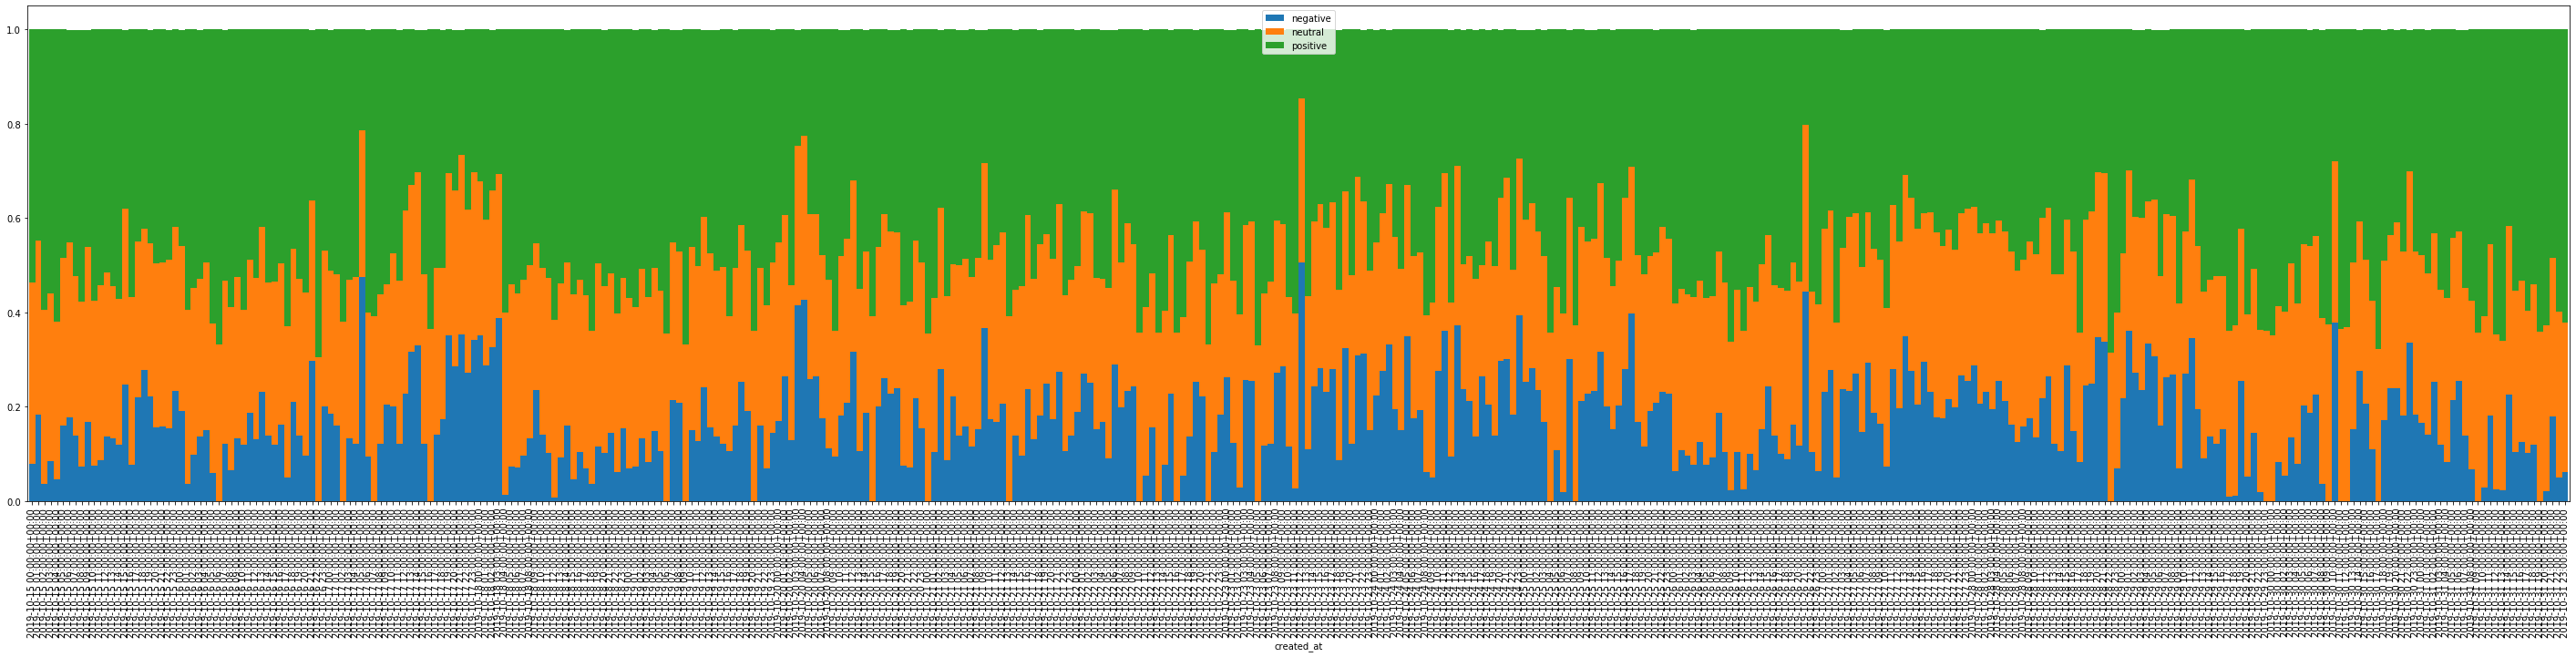

In [77]:
tweet_sentiment_df[tweet_sentiment_df['neutral']<.4].resample('H', on='created_at').mean().plot(figsize=(50,10), kind='bar', stacked=True, width=1.0)

In [70]:
dirty_hourly_btc = pathlib.Path('../../../data/dirty/crypto/Coinbase_BTCUSD_1h.csv')
BTC_price = pd.read_csv(dirty_hourly_btc,header=1)
BTC_price.head()

,2019-11-13 03-AM,BTCUSD,8733.04,8743.91,8731.64,8743.88,26.75,233692.05
0,2019-11-13 02-AM,BTCUSD,8764.90,8764.90,8726.57,8733.04,233.40,2040299.62
1,2019-11-13 01-AM,BTCUSD,8779.99,8780.00,8758.45,8764.90,106.46,933208.20
2,2019-11-13 12-AM,BTCUSD,8810.00,8838.80,8758.39,8779.99,216.42,1902443.64
3,2019-11-12 11-PM,BTCUSD,8770.74,8810.00,8760.61,8810.00,203.20,1784356.95
4,2019-11-12 10-PM,BTCUSD,8762.48,8786.76,8747.10,8770.74,178.10,1560490.62
